In [2]:
# 코드 자동완성 허용
%config Completer.use_jedi = False

# cell 너비 확장
from IPython.display import display, HTML

display(
    HTML(
        data="""
            <style>
                div#notebook-container      { width: 99%}
                div#menubar-container       { width: 99%}
                div#maintoolbar-container   { width: 99%}
            </style>
        """
    )
)

In [3]:
# import library
from IPython.display import display
import pandas as pd
pd.set_option('display.max_columns', None) # Unlimiting Output Length
pd.set_option('display.max_row', None) # Unlimiting Output Length
pd.set_option('display.max_colwidth', None) # Unlimiting Output Column Width Length

import gspread as gs
from gspread_formatting import *

# import math library
from math import *
from decimal import Decimal

import numpy as np

# clustering & visualization
from upsetplot import from_memberships, plot
import networkx as nx
import matplotlib.pyplot as plt
from networkx.drawing.nx_pydot import graphviz_layout

In [4]:
# read google spread sheet(core features)

gc = gs.service_account(filename='../secure-outpost-380004-8d45b1504f3e.json')

sheet = gc.open('CPU Feature Visualization').worksheet('simplized aws group(core)')
df = pd.DataFrame(sheet.get_all_records())
featureGroups = df['feature groups'].tolist()

df = df.drop('feature groups', axis=1)

values = []
for i in range(len(df)):
    values.append(df.iloc[i].tolist())

print(values)

[[1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0], [1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1], [1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1], [1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1], [1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0], [1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [5]:
# 활성화된 flag 개수 추출 및 활성화된 flag의 개수가 같으나 종류가 다른 그룹의 조합을 추출
flagsCount = []

for i in range(len(values)):
    count = values[i].count(1)
    flagsCount.append(count)
    print(f'group{i+2} : {count}')

duplicates = []

for value in set(flagsCount):
    if flagsCount.count(value) > 1:
        duplicates.append(value)

# print(duplicates)

for value in duplicates:
    indexes_of_ones = [index + 2 for index, count in enumerate(flagsCount) if count == value]
    print(indexes_of_ones)

group2 : 25
group3 : 15
group4 : 29
group5 : 37
group6 : 27
group7 : 28
group8 : 20
group9 : 29
group10 : 38
group11 : 21
[4, 9]


Transferable group2 to 2, 4, 
Transferable group3 to 3, 4, 5, 6, 7, 8, 9, 10, 11, 
Transferable group4 to 4, 
Transferable group5 to 5, 10, 
Transferable group6 to 6, 7, 9, 
Transferable group7 to 7, 
Transferable group8 to 8, 9, 11, 
Transferable group9 to 9, 
Transferable group10 to 10, 
Transferable group11 to 11, 


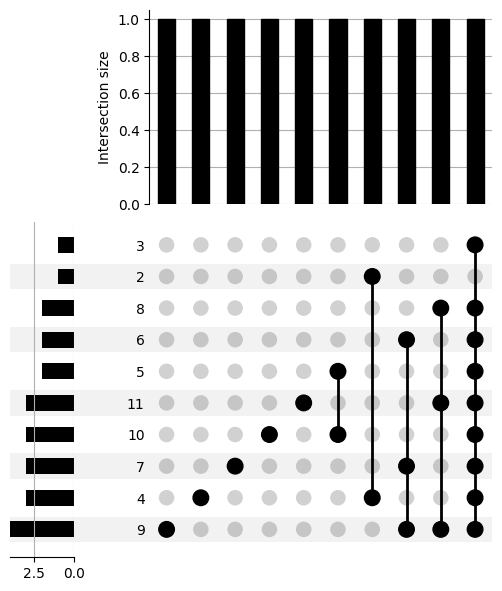

In [6]:
flagsToBinary = []

groupNumber = [str(i) for i in range(2,12)]


for value in values:
    binary_string = ''.join(str(i) for i in value)
    binary_number = int(binary_string, 2)
    flagsToBinary.append(binary_number)

matrix = []
for binary in flagsToBinary:
    row = []
    for i in range(len(flagsToBinary)):
        if(binary & flagsToBinary[i] == binary):
            row.append(True)
        else:
            row.append(False)
    matrix.append(row)

transferable = pd.DataFrame(matrix, columns=groupNumber)
transferable.index = range(2, len(transferable)+2)
transferable = transferable.groupby(groupNumber).size()

plot(transferable, orientation='horizontal')

for i in range(len(matrix)):
    print(f'Transferable group{i+2} to ',end='')
    for j in range(len(matrix[i])):
        if(matrix[i][j]):
            print(j+2, end=', ')
    print()

/var/folders/dd/cv1t_ctn165f0wl1pnb2y6_c0000gn/T/ipykernel_43129/978527793.py:45: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = graphviz_layout(G, prog='dot')


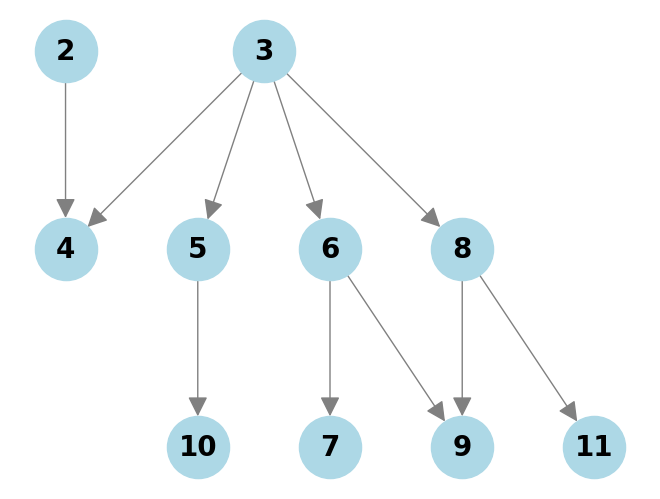

Transferable group2 to 2, 4, 
Transferable group3 to 3, 4, 5, 6, 7, 8, 9, 10, 11, 
Transferable group4 to 4, 
Transferable group5 to 5, 10, 
Transferable group6 to 6, 7, 9, 
Transferable group7 to 7, 
Transferable group8 to 8, 9, 11, 
Transferable group9 to 9, 
Transferable group10 to 10, 
Transferable group11 to 11, 


In [7]:
GROUP_NUMBER = 10

flagsToBinary = []

groupNumber = [str(i) for i in range(2,12)]

for value in values:
    binary_string = ''.join(str(i) for i in value)
    binary_number = int(binary_string, 2)
    flagsToBinary.append(binary_number)

matrix = []
for binary in flagsToBinary:
    row = []
    for i in range(len(flagsToBinary)):
        if(binary & flagsToBinary[i] == binary):
            row.append(True)
        else:
            row.append(False)
    matrix.append(row)

transferable = pd.DataFrame(matrix, columns=groupNumber)
transferable.index = range(2, len(transferable)+2)
transferable = transferable.groupby(groupNumber).size()

# 방향성 그래프 생성
G = nx.DiGraph()

# 노드 추가
for i in range(GROUP_NUMBER):
    G.add_node(i + 2)
    for j in range(len(matrix[i])):
        # 집합 관계 성립
        if(matrix[i][j]):
            # 본인을 가리키지 않도록 함.
            if(i == j):
                continue
            # 엣지 추가
            G.add_edge(i + 2, j + 2)

# Transitive reduction 적용
G = nx.transitive_reduction(G)


pos = graphviz_layout(G, prog='dot')
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=2000, font_size=20, font_weight='bold', arrowsize=30)
plt.show()

for i in range(len(matrix)):
    print(f'Transferable group{i+2} to ',end='')
    for j in range(len(matrix[i])):
        if(matrix[i][j]):
            print(j+2, end=', ')
    print()